In [308]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import os
import datetime
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


In [2]:
cwd = "/Users/andrewwilder/Desktop/girotto_lab/processed_data/"

In [3]:
os.getcwd()

'/Users/andrewwilder/Desktop/girotto_lab/processed_data/PyPrograms'

# Data Importing

In [441]:
#Lombardia
lombardia_df = pd.DataFrame()

for i in os.listdir(cwd + "Lombardia_processed"):
    if i.endswith(".xlsx"):
        d = pd.read_excel(cwd + "Lombardia_processed/" + i)
        lombardia_df = pd.concat([lombardia_df, d])

In [442]:
lombardia_df = lombardia_df[['CODICE PUNTO', 'DATA', 'MISURA SOGGIACENZA [m]']]
lombardia_df = lombardia_df.dropna()
lombardia_df.index = lombardia_df['DATA']

In [443]:
#Trento
trento_df = pd.DataFrame()

for i in os.listdir(cwd + "Piezometri_processed"):
    if i.endswith(".xlsx"):
        d = pd.read_excel(cwd + "Piezometri_processed/" + i)
        d = d[d[2] != '---']
        trento_df = pd.concat([trento_df, d])


In [444]:
trento_df = trento_df[['Unnamed: 0', 0, 2]]
trento_df = trento_df.dropna()
trento_df = trento_df.rename(columns = {'Unnamed: 0': 'station_id', 0: 'date', 2: 'level'})

In [445]:
trento_df['level'] = trento_df['level'].astype(float)
trento_df.index = pd.to_datetime(trento_df['date'], dayfirst=True)

In [446]:
#Valle d'Aosta
val_df = pd.DataFrame()

for i in os.listdir(cwd + "Valdaosta_processed"):
    if i.endswith(".xlsx"):
        d = pd.read_excel(cwd + "Valdaosta_processed/" + i)
        val_df = pd.concat([val_df, d])

In [447]:
val_df = val_df[['station_id', 'data', 'quota']]
val_df = val_df.dropna()
val_df.index = pd.to_datetime(val_df['data'])

In [448]:
#Emilia Romagna
emilia_df = pd.DataFrame()

for i in os.listdir("/Users/andrewwilder/Desktop/girotto_lab/EmiliaRomagna/acque_sotterranee_Emilia_2010-2020/format"):
    if i.endswith(".xlsx"):
        d = pd.read_excel("/Users/andrewwilder/Desktop/girotto_lab/EmiliaRomagna/acque_sotterranee_Emilia_2010-2020/format/" + i)
        d['Soggiacenza (m)'] = d['Soggiacenza (m)'].replace(r'[> | <]+', '')
        emilia_df = pd.concat([emilia_df, d])

In [449]:
emilia_df['Soggiacenza (m)'] = emilia_df['Soggiacenza (m)'].astype('string')
emilia_df['Soggiacenza (m)'] = emilia_df['Soggiacenza (m)'].str.replace(':00', '').str.replace('>', '').str.replace('<', '')\
.str.replace(':', '.').str.replace(',', '.')
mask = ~emilia_df['Soggiacenza (m)'].str.contains("1900-")
emilia_df = emilia_df[mask]
mask = ~emilia_df['Soggiacenza (m)'].str.contains("1899-")
emilia_df = emilia_df[mask]
emilia_df['Soggiacenza (m)'] = emilia_df['Soggiacenza (m)'].astype(float)
emilia_df = emilia_df.rename(columns = {'Data (gg/mm/aa)': 'Data', 'Codice_RER':'Codice', 'Data (gg/mm/aaaa)':'Data',\
                                        'Provincia':'Prov', 'Codice RER':'Codice'})
emilia_df = emilia_df.groupby(level=0,axis=1).first()
emilia_df = emilia_df[['Codice', 'Data', 'Soggiacenza (m)']]
emilia_df.index = emilia_df['Data']
emilia_df['Soggiacenza (m)'] = emilia_df['Soggiacenza (m)']*-1

In [450]:
#Veneto
veneto_df = pd.DataFrame()

for i in os.listdir(cwd + "Veneto_processed"):
    if i.endswith(".xlsx"):
        d = pd.read_excel(cwd + "Veneto_processed/" + i)
        veneto_df = pd.concat([veneto_df, d])

In [451]:
veneto_df = veneto_df[['NPOZZO', 'DATA', 'LIVELLOSTATICOmslm']]
veneto_df = veneto_df.dropna()
veneto_df.index = pd.to_datetime(veneto_df['DATA'], infer_datetime_format=True)

In [452]:
#Piedmont
piemonte_df = pd.DataFrame()

for i in os.listdir(cwd + "Piemonte_processed"):
    if i.endswith(".xlsx"):
        d = pd.read_excel(cwd + "Piemonte_processed/" + i)
        piemonte_df = pd.concat([piemonte_df, d])

In [453]:
piemonte_df = piemonte_df[['Denominazione', 'Data', 'LIVELLO PIEZOMETRICO - m']]
piemonte_df = piemonte_df.dropna()
piemonte_df.index = pd.to_datetime(piemonte_df['Data'], dayfirst=True)

# Testing

In [213]:
def seasonal_decomp_graph(dataframe, column_name, date_column, station_column, station_id, periods):
    testing_df = piemonte_df[piemonte_df[station_column] == station_id]
    testing_df.index = pd.to_datetime(testing_df[date_column], dayfirst=True)
    testing_df = testing_df[[column_name]]
    results = seasonal_decompose(testing_df, period = periods)
    return results.plot()

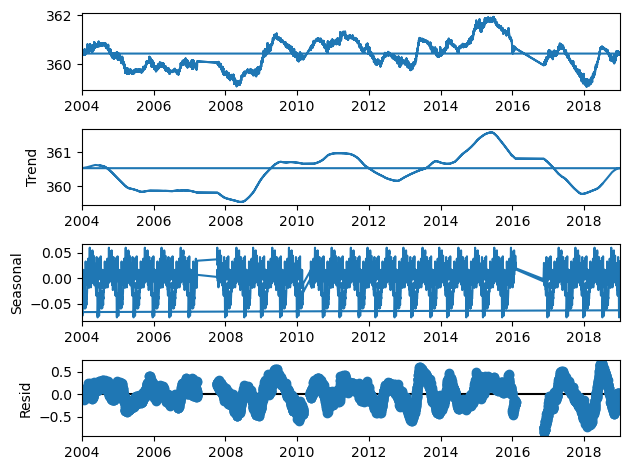

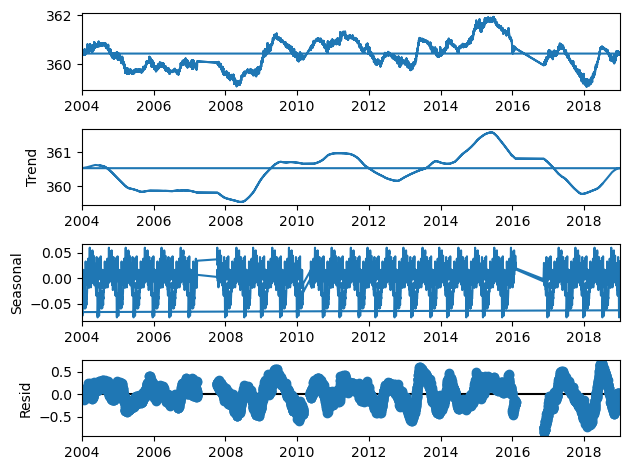

In [216]:
seasonal_decomp_graph(piemonte_df, 'LIVELLO PIEZOMETRICO - m', 'Data', 'Denominazione', 'P45', 365)

In [279]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the time series data

# Perform the decomposition
result = seasonal_decompose(piemonte_df[piemonte_df['Denominazione'] == 'T23']['LIVELLO PIEZOMETRICO - m'], model='additive', period = 365)

# Extract the trend, seasonality, and residuals
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [291]:
x = piemonte_df[piemonte_df['Denominazione'] == 'T23'].reset_index(drop = True)

In [292]:
x

,Denominazione,Data,LIVELLO PIEZOMETRICO - m
0,T23,01-01-2007,89.42
1,T23,02-01-2007,89.45
2,T23,03-01-2007,89.44
3,T23,04-01-2007,89.45
4,T23,05-01-2007,89.44
...,...,...,...
8111,T23,27-12-2018,90.48
8112,T23,28-12-2018,90.48
8113,T23,29-12-2018,90.47
8114,T23,30-12-2018,90.47


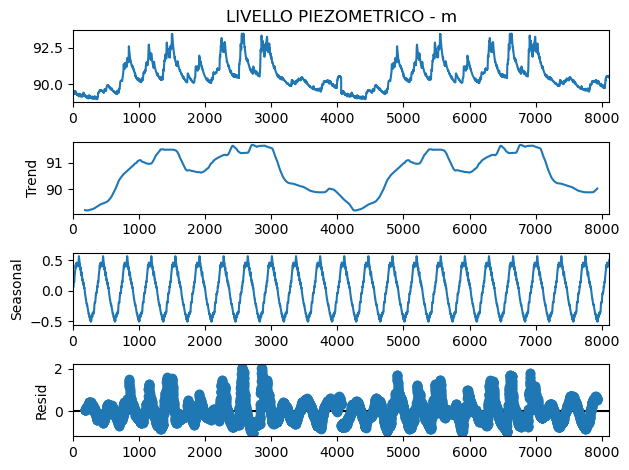

In [293]:
x1 = seasonal_decompose(x['LIVELLO PIEZOMETRICO - m'], model = 'additive', period = 365).plot()

# Statistical Analysis

In [402]:
lombardia_df['DATA'].min().year

2002

In [403]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind


def trendline(df, col):
    # Convert the index to a Unix timestamp
    hold = df.index
    
    X = df.index.values.astype('datetime64[s]').astype(float)
    
    # Extract the dependent variable
    Y = df[col].values
    
    # Calculate the slope and intercept using the least squares method
    slope, intercept = np.polyfit(X, Y, 1)
    
    # Calculate the p-value using the t-test
    t, p_value = ttest_ind(Y, intercept + slope*X)
    
    # Convert the index to a Unix timestamp for plotting
    df.index = df.index.values.astype('datetime64[s]').astype(float)
    
    # Visualize the trendline
    ax = sns.regplot(x=df.index, y=df[col], line_kws={'color': 'red', 'lw': 2})
    
    min_year = hold.min().year
    
    max_year = hold.max().year
    
    ax.set_xticklabels(np.arange(min_year, max_year))

        
    return slope, p_value


/var/folders/3n/rq9zgg8x10399x9k1pdw_kw40000gn/T/ipykernel_41669/753547835.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(min_year, max_year))


(-5.805033861912888e-09, 0.9999999999997391)

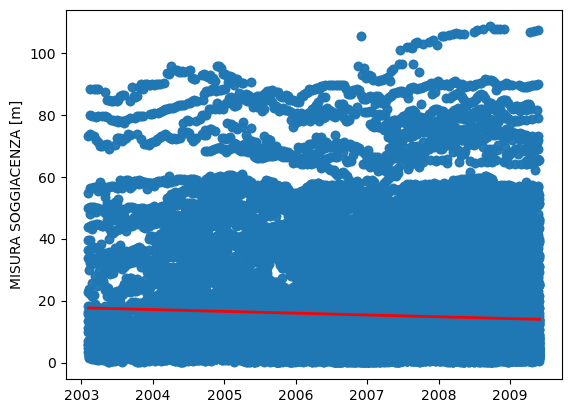

In [457]:
trendline(lombardia_df, 'MISURA SOGGIACENZA [m]')

/var/folders/3n/rq9zgg8x10399x9k1pdw_kw40000gn/T/ipykernel_41669/753547835.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(min_year, max_year))


(-3.4094233705052087e-09, 0.999999999999915)

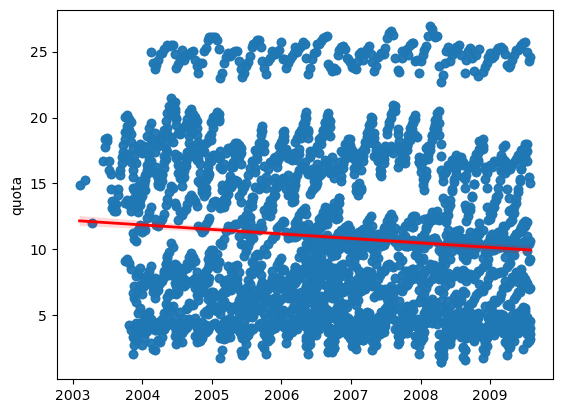

In [458]:
trendline(val_df, 'quota')

/var/folders/3n/rq9zgg8x10399x9k1pdw_kw40000gn/T/ipykernel_41669/753547835.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(min_year, max_year))


(-8.661233618467e-09, 0.9999999999999605)

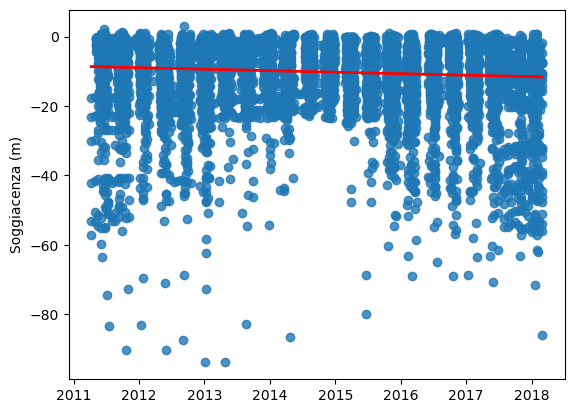

In [459]:
trendline(emilia_df, 'Soggiacenza (m)')

/var/folders/3n/rq9zgg8x10399x9k1pdw_kw40000gn/T/ipykernel_41669/753547835.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(min_year, max_year))


(8.80828900244907e-09, 0.9999999999998448)

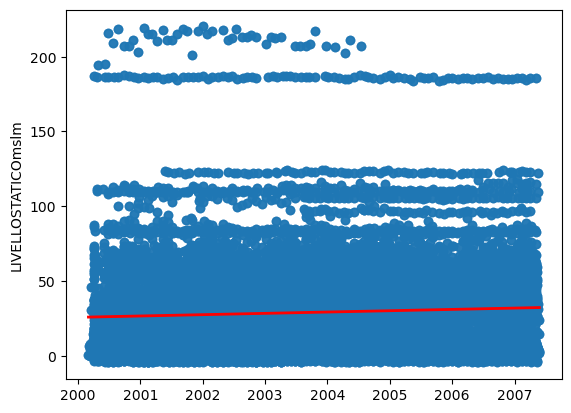

In [460]:
trendline(veneto_df, 'LIVELLOSTATICOmslm')

/var/folders/3n/rq9zgg8x10399x9k1pdw_kw40000gn/T/ipykernel_41669/753547835.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(min_year, max_year))


(-2.2428119552604297e-08, 0.999999999993753)

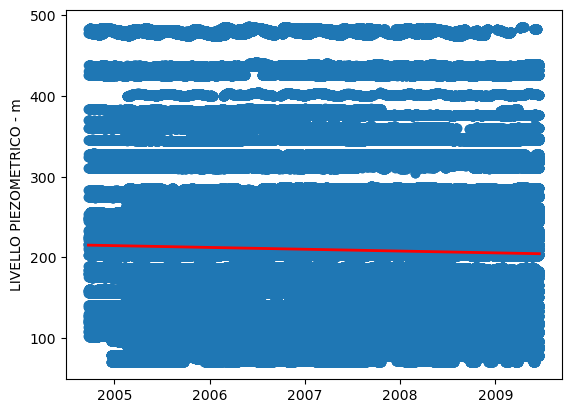

In [461]:
trendline(piemonte_df, 'LIVELLO PIEZOMETRICO - m')

/var/folders/3n/rq9zgg8x10399x9k1pdw_kw40000gn/T/ipykernel_41669/753547835.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(min_year, max_year))


(-2.5139552007683523e-09, 0.999999999997937)

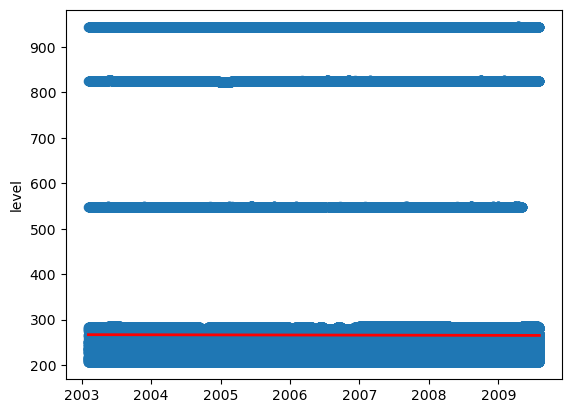

In [462]:
trendline(trento_df, 'level')

In [ ]:
# Define the dependent variable
y = lombardia_df['MISURA SOGGIACENZA [m]']

# Add a constant term to the independent variables
X = sm.add_constant(y)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the slope and p-values
print(results.params)
print(results.pvalues)

In [ ]:
#Lombardia
lombardia_X = lombardia_df['MISURA SOGGIACENZA [m]']
lombardia_y = lombardia_df.index
lombardia_X2 = sm.add_constant(lombardia_X)
est = sm.OLS(lombardia_y, lombardia_X2)
est2 = est.fit()
print(est2.summary())